# Perkenalan


Muhammad Bintang Ramadhan  
Data Science Batch 08  
Live Code 1

Terdapat sebuah dataset mengenai Biaya Ansuransi berdasarkan Usia, Jenis Kelamin, Body Mass Index, memiliki berapa anak, perokok atau bukan dan daerah tempat tinggal. dari fitur-fitur tersebut diketahui berapa biaya asuransinya.  
  
  
-   Problem  
    -   Indra ingin mengetahui program asuransi tersebut, berapa biaya asuransi yang akan Indra keluarkan jika Indra berusia 45, Jenis kelamin Laki-laki, Body Mass Index 35, Memiliki 2 anak, Seorang Perokok dan Tinggal di daerah Northwest.  
  

  
-   Objective  
    -   Saya akan memprediksi biaya asuransi Indra dengan menggunakan Machine Learning model Linear Regression.

# Import Pustaka

In [6]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.linear_model import LinearRegression

#Evaluasi Model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Import Data

In [7]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Terdapat 7 kolom, 1338 Baris/Data, dengan tipe data Object 3, Integer 2, dan Float 2

In [10]:
#Mengecek Jumlah dan berapa persen Missing Value di Fitur 'Price' 
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /693071 *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %


Tidak terdapat Missing Value Pada Dataset

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Tidak ada yang terlihat kemungkinan Outliers, tapi akan dicek pada saat data preprocessing

## Visualisasi

In [12]:
 #Function 3 plot
 def dfplot(plot,x1,y1,x2,y2,x3,y3): #untuk mendefinisikan tiap plot menggunakan fitur apa saja
    plt.rcParams['figure.figsize'] = (25,8) #Ukuran seluruh Plot dalam 3 plot

    #plot1
    plt.subplot(1,3,1) 
    plot(x1,y1, color='red')

    #plot2
    plt.subplot(1,3,2)
    plot(x2,y2, color='blue')
    
    #plot3
    plt.subplot(1,3,3)
    plot(x3,y3, color='green')

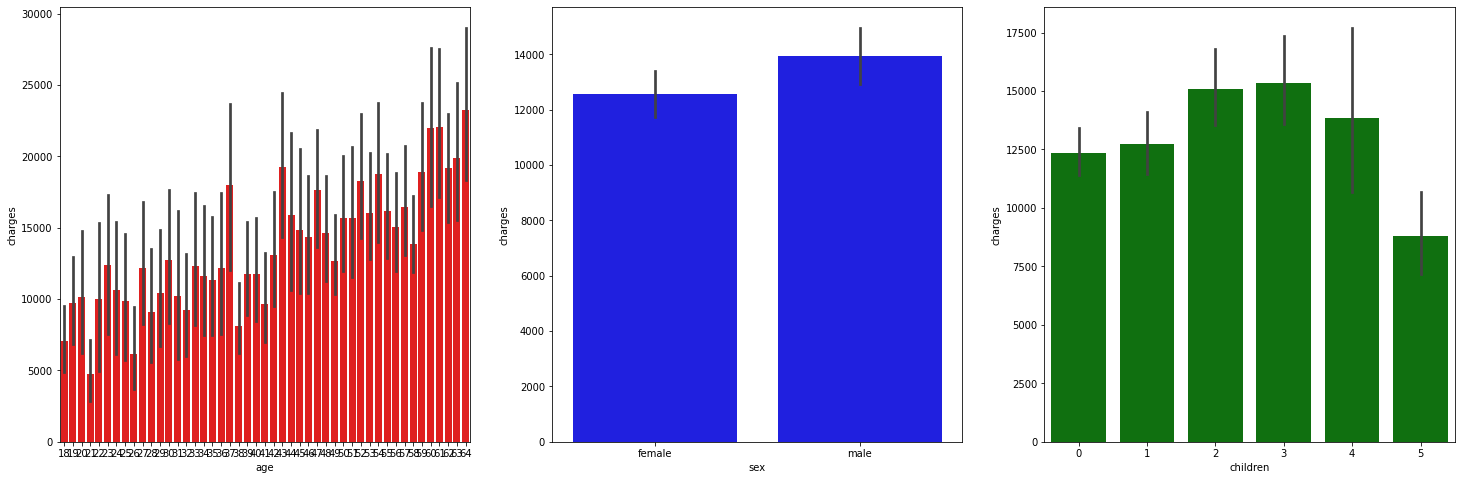

In [13]:
dfplot(sns.barplot, df.age, df.charges, df.sex, df.charges, df.children, df.charges)

-   Terlihat bahwa fitur Age, semakin Tua semakin besar biaya asuransi yang dikeluarkan  
-   Male lebih banyak mengeluarkan Biaya Asuransi  
-   Memiliki Children 3 lebih besar membayar biaya asuransi

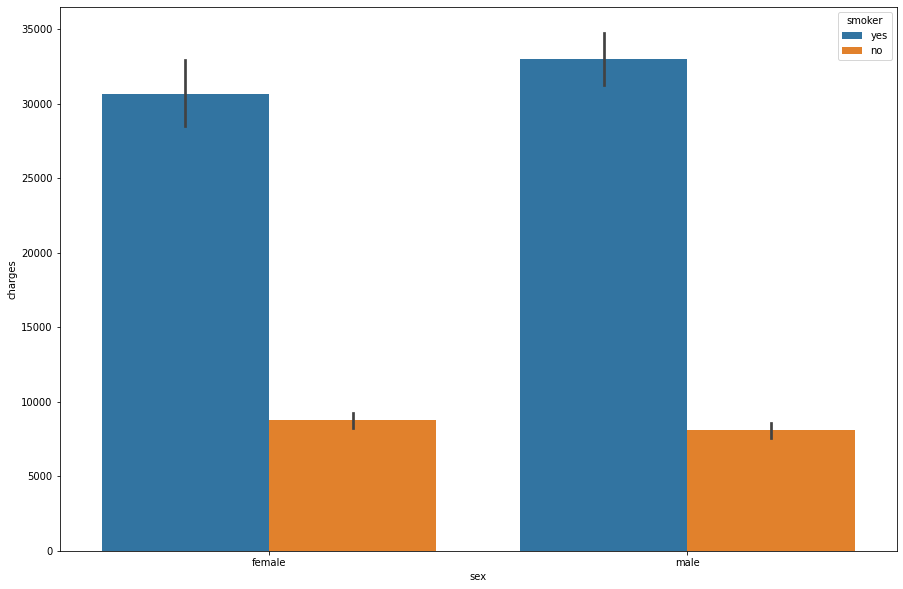

In [14]:
plt.rcParams['figure.figsize'] = (15,10)

sns.barplot(data=df, x=df.sex, y=df.charges, hue=df.smoker)

plt.show()

-   Perokok akan mendapat biaya asuransi lebih tinggi, Female or Male tidak terlalu berbeda signifikan.

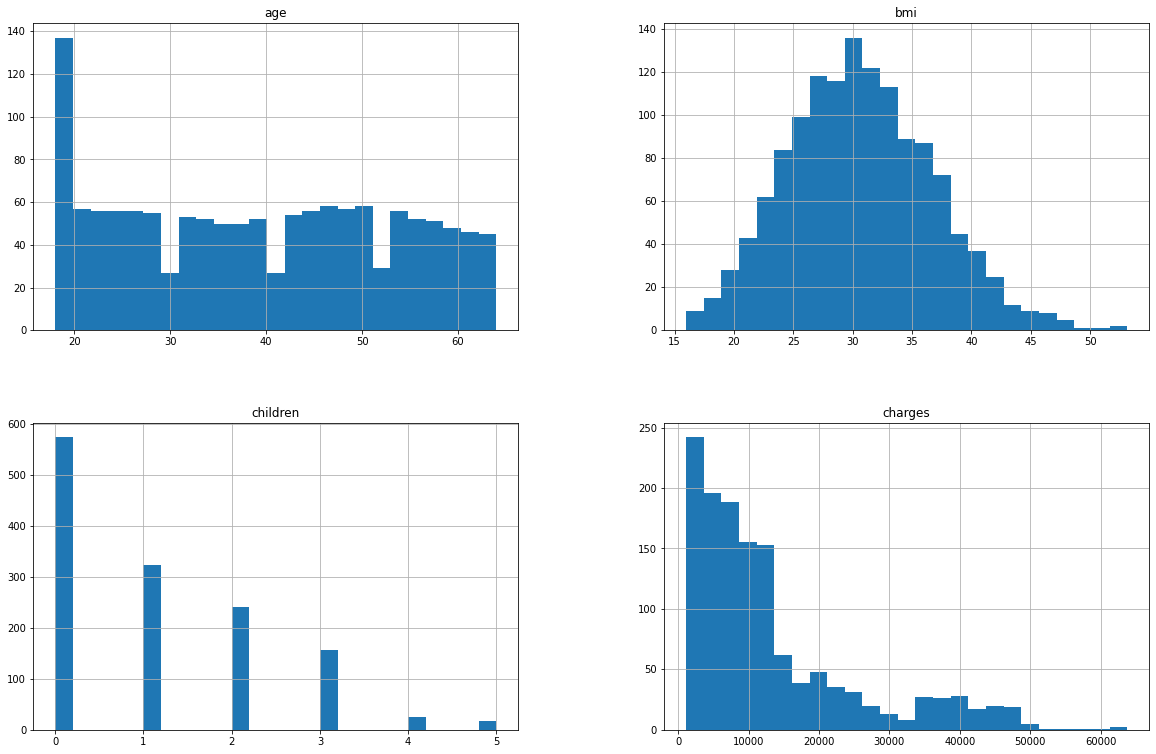

In [15]:
df.hist(bins=25, figsize=(20,13))
plt.show()

-    Kemungkinan beberapa fitur skewness dan fitur bmi terlihat Gaussian, tetapi akan dicek ulang mencari nilai skewnessnya.

# Data Preprocessing

Karna Tidak Ada Missing Value Maka hanya akan dilakukan Feature selection,Handling Outliers, Handling Scalling, Handling encoding

## Get Data Inference

In [16]:
#Mengambil sepuluh data dari dataset untuk dijadikan data inference
inf = df.sample(5, random_state=33)
inf

,age,sex,bmi,children,smoker,region,charges
663,18,male,33.660,0,no,southeast,1136.39940
526,19,female,30.590,2,no,northwest,24059.68019
790,39,female,41.800,0,no,southeast,5662.22500
20,60,female,36.005,0,no,northeast,13228.84695
229,47,male,25.460,2,no,northeast,9225.25640


In [17]:
# Menghapus data Inference dari dalam dataset
df_train_test = df.drop(inf.index)
df_train_test.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [18]:
# Reset Index untuk Data_train_test dan data for inference
df_train_test.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

## feature Selection

Text(0.5, 1.0, 'Heatmap Korelasi')

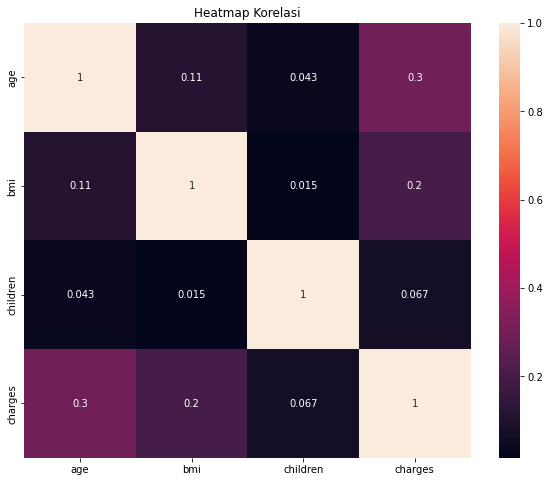

In [19]:
plt.figure(figsize=(10,8)) #Ukuran Plot
sns.heatmap(df_train_test.corr(), annot=True) #Menampilkan korelasi dari df_train_test, yang saya fokuskan korelasi terhadap fitur 'Price'
plt.title('Heatmap Korelasi') #Title plot

-   Age dan bmi memiliki High Correlation.  
-   Children memiliki korelasi yang kecil, tapi dalam kasus ini saya rasa jumlah anak berpengaruh terhadap biaya asuransi.  
  
-   Sex, Smoker dan Region saya rasa dalam kasus ini berpengaruh terhadap biaya asuransi
  
Jadi tidak akan ada fitur yang didrop.

## Train Test Split

In [20]:
# Splitting Dataset menggunakan sklearn train_test_split
# Membagi untuk data train 80% dan test 20%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_test, test_size=0.2, random_state=8)

print(train.shape)
print(test.shape)

(1066, 7)
(267, 7)


## Handling Outliers

In [21]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

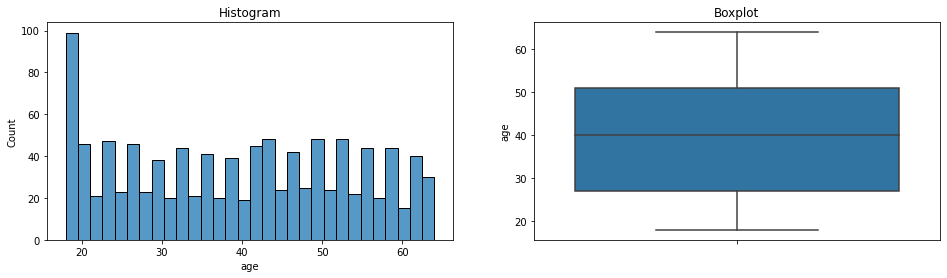

Nilai Skew :  0.027373473683486235



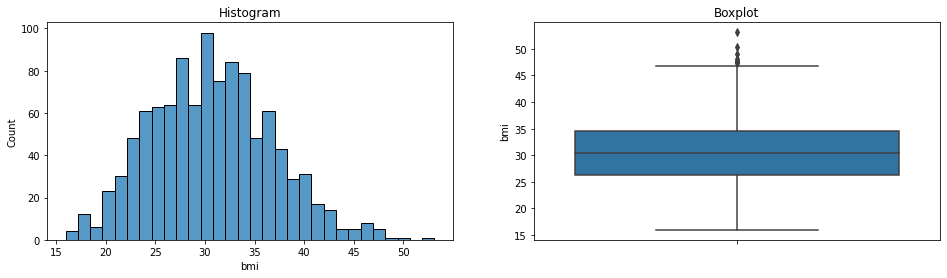

Nilai Skew :  0.2999101995695587



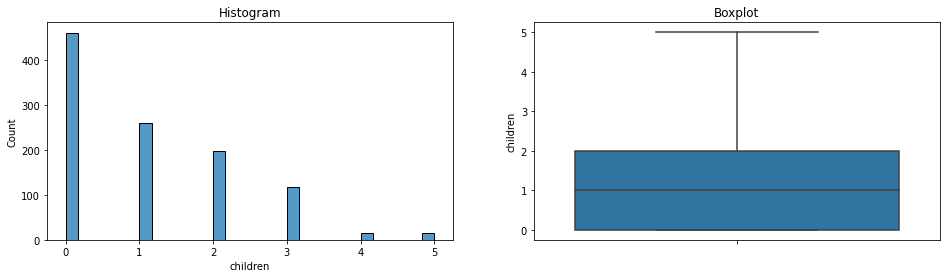

Nilai Skew :  0.9713675552867402



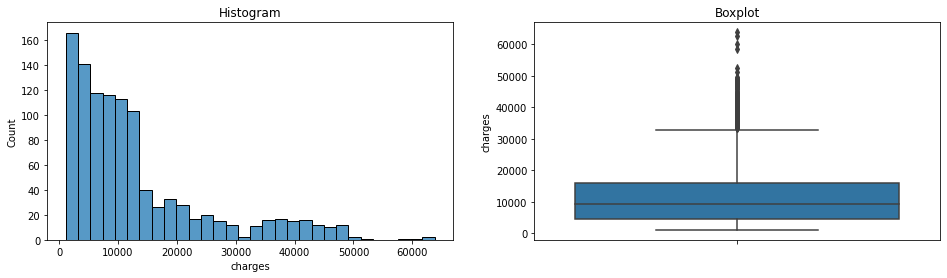

Nilai Skew :  1.5842574151065807



In [22]:
for var in train.select_dtypes(np.number): #Looping semua data dtrain Numerik
    identify_plots(train, var)
    print('Nilai Skew : ', train[var].skew()) #Nilai skewness dari tiap data numerik 
    print()

-   Charges tidak akan dilakukan apapun karena akan menjadi targe
-   Age dan bmi memiliki distribusi data normal maka akan dilakukan handling outlier menggunakan mean +- 3*std
-   Children memiliki data skewness makan akan dilakukan Handling Outliers menggunakan IQR

### Outliers Detection

In [23]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas

    return upper_boundary_skew, lower_boundary_skew

In [24]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan mean +- 3 * standard deviasi.
def find_normal_boundaries(df, variable):
    upper_boundary_normal = df[variable].mean() + 3 * df[variable].std() # batas atas normal
    lower_boundary_normal = df[variable].mean() - 3 * df[variable].std() # batas bawah normal

    return upper_boundary_normal, lower_boundary_normal

Melihat Jumlah batas atas dan batas bawah fitur normal

age

In [25]:
# Melihat batas atas dan batas bawah variable age
age_upper_boundary_normal, age_lower_boundary_normal = find_normal_boundaries(train, 'age')
age_upper_boundary_normal, age_lower_boundary_normal

(81.1535061019201, -2.2848381844716883)

In [26]:
# Melihat jumlah dan percent data outliers variable age
print('Jumlah data age diatas 81.15   : {}'.format(len(train[train['age'] > age_upper_boundary_normal])))
print('Jumlah data age dibawah -2   : {}'.format(len(train[train['age'] < age_lower_boundary_normal])))
print()
print('% Jumlah data age diatas 81.15 : {}'.format(len(train[train['age'] > age_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data age dibawah -2 : {}'.format(len(train[train['age'] < age_lower_boundary_normal])/len(train) * 100))

Jumlah data age diatas 81.15   : 0
Jumlah data age dibawah -2   : 0

% Jumlah data age diatas 81.15 : 0.0
% Jumlah data age dibawah -2 : 0.0


Ternyata pada fitur age tidak memiliki outliers

bmi

In [27]:
# Melihat batas atas dan batas bawah variable bmi
bmi_upper_boundary_normal, bmi_lower_boundary_normal = find_normal_boundaries(train, 'bmi')
bmi_upper_boundary_normal, bmi_lower_boundary_normal

(48.95258625431366, 12.477573220358021)

In [28]:
# Melihat jumlah dan percent data outliers variable bmi
print('Jumlah data bmi diatas 81.15   : {}'.format(len(train[train['bmi'] > bmi_upper_boundary_normal])))
print('Jumlah data bmi dibawah -2   : {}'.format(len(train[train['bmi'] < bmi_lower_boundary_normal])))
print()
print('% Jumlah data bmi diatas 81.15 : {}'.format(len(train[train['bmi'] > bmi_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data bmi dibawah -2 : {}'.format(len(train[train['bmi'] < bmi_lower_boundary_normal])/len(train) * 100))

Jumlah data bmi diatas 81.15   : 3
Jumlah data bmi dibawah -2   : 0

% Jumlah data bmi diatas 81.15 : 0.28142589118198874
% Jumlah data bmi dibawah -2 : 0.0


Terdapat Ouliers pada batas atas sebanyak 3 data atau 0.2% maka akan dilakukan trimming

Melihat Jumlah batas atas dan batas bawah fitur skew

Children


In [29]:
# Melihat batas atas dan batas bawah variable children
children_upper_boundary_skew, children_lower_boundary_skew = find_skewed_boundaries(train, 'children', 1.5)
children_upper_boundary_skew, children_lower_boundary_skew

(5.0, -3.0)

In [30]:
# Melihat jumlah dan percent data outliers variable children
print('Jumlah data children diatas 5.0   : {}'.format(len(train[train['children'] > children_upper_boundary_skew])))
print('% Jumlah data children diatas 5.0 : {}'.format(len(train[train['children'] > children_upper_boundary_skew])/len(train) * 100))

Jumlah data children diatas 5.0   : 0
% Jumlah data children diatas 5.0 : 0.0


Tidak terdapat Outliers pada fitur age

### trimming

Hanya Pada fitur bmi yang memiliki Outliersn maka akan dilakukan Trimming

In [31]:
#Normal
# Menandai Outliers di variable 'bmi'
outliers_bmi = np.where(train['bmi'] > bmi_upper_boundary_normal, True,
                       np.where(train['bmi'] < bmi_lower_boundary_normal, True, False))

In [32]:
#Menghapus Outliers
train_trimmed = train.loc[~(outliers_bmi)] 

#Melihat Jumlah Data sebelum dan sesudah dilakukan Trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (1066, 7)
Data Train - After trimming  :  (1063, 7)


Telah dilakukan Handling Outliers Trimming 3 Data

## Pipeline for Scalling and Encoding

In [33]:
# Mendefinikan Target

# untuk Train data
X_train = train.drop(columns=['charges']) #Fitur
y_train = train['charges'] #Target

# untuk Test data
X_test = test.drop(columns=['charges']) #Fitur
y_test = test['charges'] #Target

In [34]:
# Membuat Numerical dan Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

cat_col, num_col

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

In [35]:
X_train.head()

,age,sex,bmi,children,smoker,region
461,56,male,25.935,0,no,northeast
116,29,female,27.940,1,yes,southeast
468,27,male,32.670,0,no,southeast
783,21,male,36.860,0,no,northwest
250,54,male,34.210,2,yes,southeast


In [36]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('encode', OneHotEncoder())]
)

In [37]:
#Membuat Pipline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

# Modelling

In [38]:
#Membuat Model Linear Regression
# Model Linear Regression dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_linreg = Pipeline([
    ('prep', preprocessor),
    ('alg', LinearRegression(fit_intercept=True))
])

In [39]:
# Training Model
pipe_linreg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('alg', LinearRegression())])

## Evaluation Score

In [40]:
MLA = [pipe_linreg]

In [41]:
# Predict & Evaluation score
name = ['Linear Regression']
R_squared_train = []
R_squared_test = []
mae = []
mse = []
rmse = []
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    R_squared_train.append(metrics.r2_score(y_train,  y_pred_train))
    R_squared_test.append(metrics.r2_score(y_test,  y_pred_test))
    mae.append(metrics.mean_absolute_error(y_test, y_pred_test))
    mse.append(metrics.mean_squared_error(y_test, y_pred_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

eval_score = pd.DataFrame({'Name' : name, 'R Squared Train': R_squared_train, 'R Squared Test': R_squared_test, 'MAE Score': mae, 'MSE Score': mse, 'RMSE Score': rmse})

In [42]:
eval_score

,Name,R Squared Train,R Squared Test,MAE Score,MSE Score,RMSE Score
0,Linear Regression,0.753811,0.744538,4457.05431,4.170019e+07,6457.568565


-   Melihat hasil dari R-Squared 0.75 hasil yang kurang baik, tetapi model good fit
-   Error Scorenya tinggi

## Cross Validation

In [43]:
cv_result = cross_val_score(pipe_linreg, X_test, y_test, scoring='r2', cv=10)
cv_result.mean()

0.7303234233601492

Hasil cross validation 0.73 berarti hasil R-Squared yang lebih bisa dipercaya adalah 0.73

# Model Inference

Model Inference dari Data Inference yang diambil dari dataset

In [44]:
y_pred_inf = pipe_linreg.predict(inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Charges - Prediction'])
y_pred_inf

,Charges - Prediction
0,2717.990445
1,3284.879572
2,10846.232802
3,15428.014131
4,9792.691831


Model Inference yang berdasarkan kasus yang diambil dari kasus Indra

In [45]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [46]:
indra = [{
    'age': 45,
    'sex': 'male',
    'bmi' : 35.00,
    'children' : 2,
    'smoker' : 'yes',
    'region' : 'northwest',

}]
indra = pd.DataFrame(indra)
indra

,age,sex,bmi,children,smoker,region
0,45,male,35.0,2,yes,northwest


In [47]:
y_pred_indra = pipe_linreg.predict(indra)
y_pred_indra = pd.DataFrame(y_pred_indra, columns=['Price - Prediction'])
y_pred_indra

,Price - Prediction
0,35483.993031


# Kesimpulan

-   Problem  
    -   Indra ingin mengetahui program asuransi tersebut, berapa biaya asuransi yang akan Indra keluarkan jika Indra berusia 45, Jenis kelamin Laki-laki, Body Mass Index 35, Memiliki 2 anak, Seorang Perokok dan Tinggal di daerah Northwest.  
  

  
-   Objective  
    -   Saya akan memprediksi biaya asuransi Indra dengan menggunakan Machine Learning model Linear Regression.  
  
-   Hasil Prediksi
    -   Indra harus mengeluarkan biaya 35,483 $ (tiga puluh lima ribu, empat ratus delapan puluh tiga Dollar)

## Kesimpulan Model

Model menggunakan Linear regression hanyan mendapat score 0.73 artinya model tidak cukup baik